# Estadística descriptiva básica

## Estadísticos

In [1]:
import pandas as pd

In [2]:
df_sel = pd.read_csv('../data/results/df_sel.csv')
df_sel

,timestamp,lat,lon,h,variable,value
0,2017-01-01 00:00:00,25.670,-100.338,560,PM10,143.0
1,2017-01-01 01:00:00,25.670,-100.338,560,PM10,183.0
2,2017-01-01 02:00:00,25.670,-100.338,560,PM10,142.0
3,2017-01-01 03:00:00,25.670,-100.338,560,PM10,101.0
4,2017-01-01 04:00:00,25.670,-100.338,560,PM10,85.0
...,...,...,...,...,...,...
5124400,2019-12-31 19:00:00,25.665,-100.413,636,WD,82.0
5124401,2019-12-31 20:00:00,25.665,-100.413,636,WD,87.0
5124402,2019-12-31 21:00:00,25.665,-100.413,636,WD,98.0
5124403,2019-12-31 22:00:00,25.665,-100.413,636,WD,104.0


In [3]:
# Tipo de dato
type(df_sel)

pandas.core.frame.DataFrame

In [4]:
# Tipo de datos de las columnas
df_sel.dtypes

timestamp     object
lat          float64
lon          float64
h              int64
variable      object
value        float64
dtype: object

In [5]:
# A dato temporal
df_sel.timestamp = pd.to_datetime(df_sel.timestamp)

In [6]:
df_sel.dtypes

timestamp    datetime64[ns]
lat                 float64
lon                 float64
h                     int64
variable             object
value               float64
dtype: object

Rápidamente se pueden encontrar descriptores estadísticos de los datos con `describe`.

In [7]:
df_sel.describe()

,lat,lon,h,value
count,5.124405e+06,5.124405e+06,5.124405e+06,3.441764e+06
mean,2.568126e+01,-1.002964e+02,5.370769e+02,9.051482e+01
std,1.118940e-01,1.476078e-01,1.092896e+02,1.998082e+02
min,2.536000e+01,-1.005860e+02,3.400000e+02,-2.060000e+01
25%,2.566500e+01,-1.003660e+02,4.760000e+02,1.970000e+00
50%,2.567600e+01,-1.003099e+02,5.280000e+02,1.616000e+01
75%,2.575700e+01,-1.002489e+02,6.300000e+02,5.600000e+01
max,2.580000e+01,-9.999550e+01,7.160000e+02,2.134000e+03


Pero esto no es muy informativo dado que hay diferentes variables, estaciones de monitoreo y tiempos de lectura. Para ello se puede separar el conjunto de datos en subconjuntos. Por ejemplo, por variable.

In [8]:
gp_sel_variable = df_sel.groupby('variable')

Esto se puede iterar (se muestra sólo una iteración como ejemplo).

In [9]:
for name, group in gp_sel_variable:
    print(name)
    display(group)
    print('Etcétera')
    break

BP


,timestamp,lat,lon,h,variable,value
3416270,2017-01-01 00:00:00,25.670,-100.338,560,BP,709.2
3416271,2017-01-01 01:00:00,25.670,-100.338,560,BP,708.9
3416272,2017-01-01 02:00:00,25.670,-100.338,560,BP,708.5
3416273,2017-01-01 03:00:00,25.670,-100.338,560,BP,708.2
3416274,2017-01-01 04:00:00,25.670,-100.338,560,BP,707.9
...,...,...,...,...,...,...
3757892,2019-12-31 19:00:00,25.665,-100.413,636,BP,715.1
3757893,2019-12-31 20:00:00,25.665,-100.413,636,BP,714.9
3757894,2019-12-31 21:00:00,25.665,-100.413,636,BP,715.0
3757895,2019-12-31 22:00:00,25.665,-100.413,636,BP,715.1


Etcétera


También es posible filtrar resultados.

In [10]:
df_pm10 = df_sel[df_sel.variable == 'PM10']

Ya con esto, se pueden obtener el resumen estadístico de los datos.

In [11]:
df_pm10.value.describe()

count    308536.000000
mean         59.192723
std          42.661375
min           2.000000
25%          32.000000
50%          49.000000
75%          74.000000
max         791.000000
Name: value, dtype: float64

## Medidas de tendencia central

### Media

Suma de todos los elementos $x_i$ de conjunto $X$ dividida entre el número total de elementos $n$,
$$\sum_i^n x_i / n.$$

Aunque se pueden usar funciones nativas de Python o integradas de `pandas` o `numpy` para los cálculos de los estadísticos, aprovecharemos esta sección para conocer la librería [`statistics`](https://docs.python.org/3/library/statistics.html).

In [12]:
import statistics

In [13]:
statistics.mean(df_pm10.value)

nan

Aquí tenemos un problema, pues aparece `nan` como resultado de la media. Esto sucede porque en el conjunto de registros de `value` hay valores no numéricos (_not a number_ o `nan`). Veamos cuántos `nan` hay.

In [14]:
# Qué celdas son nan
df_pm10.isna()

,timestamp,lat,lon,h,variable,value
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
341622,False,False,False,False,False,False
341623,False,False,False,False,False,False
341624,False,False,False,False,False,False
341625,False,False,False,False,False,False


In [15]:
# Total de nan por columna
df_pm10.isna().sum(axis=0)

timestamp        0
lat              0
lon              0
h                0
variable         0
value        33091
dtype: int64

In [16]:
# Total de nan por fila (aquí es trivial calcularlo)
df_pm10.isna().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
341622    0
341623    0
341624    0
341625    0
341626    0
Length: 341627, dtype: int64

In [17]:
# Con esto vemos cuáles valores son nan
filtro = df_pm10.value.isna()
filtro

0         False
1         False
2         False
3         False
4         False
          ...  
341622    False
341623    False
341624    False
341625    False
341626    False
Name: value, Length: 341627, dtype: bool

In [18]:
# Esto nos devuelve las filas que son True en el filtro anterior
# O sea, todos los nan en value
df_pm10_nan = df_pm10[filtro]
df_pm10_nan

,timestamp,lat,lon,h,variable,value
219,2017-01-10 03:00:00,25.670,-100.338,560,PM10,NaN
232,2017-01-10 16:00:00,25.670,-100.338,560,PM10,NaN
255,2017-01-11 15:00:00,25.670,-100.338,560,PM10,NaN
294,2017-01-13 06:00:00,25.670,-100.338,560,PM10,NaN
419,2017-01-18 11:00:00,25.670,-100.338,560,PM10,NaN
...,...,...,...,...,...,...
341424,2019-12-23 13:00:00,25.665,-100.413,636,PM10,NaN
341425,2019-12-23 14:00:00,25.665,-100.413,636,PM10,NaN
341426,2019-12-23 15:00:00,25.665,-100.413,636,PM10,NaN
341476,2019-12-25 17:00:00,25.665,-100.413,636,PM10,NaN


Podemos contarlos.

In [19]:
len(df_pm10_nan)

33091

También se puede encontrar la proporción de valores faltantes.

In [20]:
len(df_pm10_nan) / len(df_pm10)

0.09686295286965023

Ahora, pueden realizarse varias estrategias para calcular la media de estos valores. La más común es ignorar los `nan`.

In [21]:
# Elimina los valores nan
df_pm10.dropna()

,timestamp,lat,lon,h,variable,value
0,2017-01-01 00:00:00,25.670,-100.338,560,PM10,143.0
1,2017-01-01 01:00:00,25.670,-100.338,560,PM10,183.0
2,2017-01-01 02:00:00,25.670,-100.338,560,PM10,142.0
3,2017-01-01 03:00:00,25.670,-100.338,560,PM10,101.0
4,2017-01-01 04:00:00,25.670,-100.338,560,PM10,85.0
...,...,...,...,...,...,...
341622,2019-12-31 19:00:00,25.665,-100.413,636,PM10,12.0
341623,2019-12-31 20:00:00,25.665,-100.413,636,PM10,15.0
341624,2019-12-31 21:00:00,25.665,-100.413,636,PM10,20.0
341625,2019-12-31 22:00:00,25.665,-100.413,636,PM10,20.0


In [22]:
# Media sin nan
statistics.mean(df_pm10.value.dropna())

59.19272334508777

In [23]:
# Cálculo de media más rápida para grandes conjuntos de datos
statistics.fmean(df_pm10.value.dropna())

59.19272334508777

La **media ponderada** es una medida de tendencia central que da a los $n$ valores de un conjunto de datos $x$ un peso $w_i; i = [1, n]$, para luego calcular la media de los valores multiplicados por su peso asignado, tal que 

$$\frac{\sum_i w_i x_i}{\sum_i w_i}.$$

Es recomendable que $\sum_i w_i = 1$. En la librería `statistics`, la función `fmean` puede tomar como parámetro los pesos.

In [24]:
df_pm10_dropna = df_pm10.dropna()

Con `pandas` se pueden usar filtros para series de tiempo. En el siguiente ejemplo, se utiliza `dt` para acceder a las propiedades de la serie de tiempo. El parámetro `day_of_week` (hay más selectores) asigna `0` al lunes, `1` al martes... `6` al domingo.

In [25]:
df_pm10_dropna[df_pm10_dropna.timestamp.dt.day_of_week == 6]

,timestamp,lat,lon,h,variable,value
0,2017-01-01 00:00:00,25.670,-100.338,560,PM10,143.0
1,2017-01-01 01:00:00,25.670,-100.338,560,PM10,183.0
2,2017-01-01 02:00:00,25.670,-100.338,560,PM10,142.0
3,2017-01-01 03:00:00,25.670,-100.338,560,PM10,101.0
4,2017-01-01 04:00:00,25.670,-100.338,560,PM10,85.0
...,...,...,...,...,...,...
341574,2019-12-29 19:00:00,25.665,-100.413,636,PM10,47.0
341575,2019-12-29 20:00:00,25.665,-100.413,636,PM10,46.0
341576,2019-12-29 21:00:00,25.665,-100.413,636,PM10,46.0
341577,2019-12-29 22:00:00,25.665,-100.413,636,PM10,32.0


Supongamos que queremos dar un peso por cada día de la semana, de manera incremental. El lunes pesaría $1$, el martes $2$... el domingo $7$. Como es recomendable que estos pesos sumen $1$, se puede hacer una función para obtener la porción equivalente.

In [26]:
days_int = list(range(1, 8))
days_int_sum = sum(days_int)
for i in range(7):
    days_int[i] = days_int[i] / days_int_sum
sum(days_int)

1.0

A partir de eso, se pueden asignar pesos a los días de la semana con un ciclo.

In [27]:
df_pm10_dropna['w'] = -1 # Se añade una columna para los pesos
for i in range(7): # Para cada día de la semana
    df_pm10_dropna.loc[ # vamos a asignar
        df_pm10_dropna.timestamp.dt.day_of_week == i, # a las rilas de ese día
        'w' # en la columna para los pesos
    ] = days_int[i] # el valor del peso normalizado correspondiente
df_pm10_dropna

C:\Users\user\AppData\Local\Temp\ipykernel_7668\3327214980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10_dropna['w'] = -1 # Se añade una columna para los pesos


,timestamp,lat,lon,h,variable,value,w
0,2017-01-01 00:00:00,25.670,-100.338,560,PM10,143.0,0.250000
1,2017-01-01 01:00:00,25.670,-100.338,560,PM10,183.0,0.250000
2,2017-01-01 02:00:00,25.670,-100.338,560,PM10,142.0,0.250000
3,2017-01-01 03:00:00,25.670,-100.338,560,PM10,101.0,0.250000
4,2017-01-01 04:00:00,25.670,-100.338,560,PM10,85.0,0.250000
...,...,...,...,...,...,...,...
341622,2019-12-31 19:00:00,25.665,-100.413,636,PM10,12.0,0.071429
341623,2019-12-31 20:00:00,25.665,-100.413,636,PM10,15.0,0.071429
341624,2019-12-31 21:00:00,25.665,-100.413,636,PM10,20.0,0.071429
341625,2019-12-31 22:00:00,25.665,-100.413,636,PM10,20.0,0.071429


In [28]:
# Ahora ya se puede calcular esta media ponderada
statistics.fmean(df_pm10_dropna.value, weights=df_pm10_dropna.w)

58.91692992393067

In [29]:
# Media armónica

In [30]:
# Media geométrica

### Mediana

Tras ordenar un conjunto de $n$ datos, la mediana es el elemento que se encuentra en la posición $0.5 (n+1)$ si $n$ es impar, mientras que para $n$ par la mediana es la media de las posiciones $0.5 (n)$ y $0.5 (n+1)$.

In [31]:
statistics.median(df_pm10_dropna.value)

49.0

Exploremos la cantidad de valores $n$ de $\text{PM}_{10}$.

In [32]:
len(df_pm10_dropna.value)

308536

Como $n$ es par, entonces podemos pedir los números sobre los que se calcula la media con

In [33]:
statistics.median_low(df_pm10_dropna.value)

49.0

In [34]:
statistics.median_high(df_pm10_dropna.value)

49.0

Ja, de todas formas parece que hay varios $49$ por ahí. Lo veremos más adelante cuando hagamos representaciones visuales de estos datos.

### Moda

La moda representa el valor que más se repite en un conjunto de datos.

In [35]:
statistics.mode(df_pm10_dropna.value)

36.0

Si sólo hay un valor que represente la moda, los datos son unimodales, mientras que si hay empates los datos son multimodales (con dos o más valores que representan la moda). Eso se puede calcular también (aunque aquí nomás hay uno, jeje).

In [36]:
statistics.multimode(df_pm10_dropna.value)

[36.0]

## Medidas de dispersión

### Varianza

La varianza de una muestra $s^2$ refleja lo alejados que se encuentran $n$ datos de un conjunto de datos $x$ de su media $\bar{x}$, o sea
$$s^2 = \frac{\sum_i (x_i - \bar{x})^2}{n-1}.$$

In [37]:
statistics.variance(df_pm10_dropna.value)

1819.9928809995927

La varianza poblacional $\sigma^2$ se mide a partir de $n$ datos de una población $x$ y su distancia respecto a la media poblacional $\mu$, a saber
$$\sigma^2 = \frac{\sum_i (x_i - \bar{\mu})^2}{n}.$$

In [38]:
statistics.pvariance(df_pm10_dropna.value)

1819.9869821972454

Cuando se tiene toda la población, se usa la varianza poblacional. En este caso, tenemos una muestra (quitamos los `nan`), así que se usaría la muestral.

### Desviación estándar

Raíz cuadrada de la varianza muestral y poblacional, que transforma el estadístico a la misma unidad de medida de los datos.

In [39]:
statistics.stdev(df_pm10_dropna.value)

42.66137457934979

In [40]:
statistics.pstdev(df_pm10_dropna.value)

42.6613054441287

### Sesgo
Dirección de desviación de los datos respecto a la media.
$$\frac{\sum_i(x_i − \bar{x})^3 n}{(n − 1)(n − 2)s^3}.$$

Valores de sesgo negativos indican predominancia de elementos menores a la media, sesgo positivo son mayor cantidad de elementos mayores a la media, y sesgo cercano a $0$ (entre $-0.5, 0.5$) cuenta con elementos distribuidos simétricamente. No existe esta medida en `statistics`, pero sí en `pandas`.

In [41]:
df_pm10_dropna.value.skew()

3.049912093573379

### Cuantiles
Valores que representan divisiones de $n$ datos. Usualmente se dividen los datos en cuatro (cuartiles), diez (deciles), cien (percentiles), pero pueden dividirse por cualquir número $q$. Una vez determinadas las $q$ divisiones, se pueden calcular el cuantil $Q_k$ de una posición $k: 0 \leq k \leq q$ mediante
$$Q_k = \frac{kn}{q}.$$

In [42]:
# Esto nos da los cuartiles de la muestra
statistics.quantiles(df_pm10_dropna.value, n = 4)

[32.0, 49.0, 74.0]

In [43]:
# Si tuviéramos una población, se usaría
statistics.quantiles(df_pm10_dropna.value, n = 10, method='inclusive')

[21.0, 29.0, 36.0, 42.0, 49.0, 57.0, 67.0, 81.0, 107.0]

### Rangos
Mínimos y máximos.

In [44]:
min(df_pm10_dropna.value)

2.0

In [45]:
max(df_pm10_dropna.value)

791.0

## Visualización

Todos estos estadísticos pueden representarse en algunos gráficos. La librería [`matplotlib`](https://matplotlib.org/) permite generar gráficos en Python.

In [46]:
import matplotlib.pyplot as plt

Los histogramas permiten visualizar la distribución de los datos, agrupando el conteo de valores de datos en barras de rangos definidos.

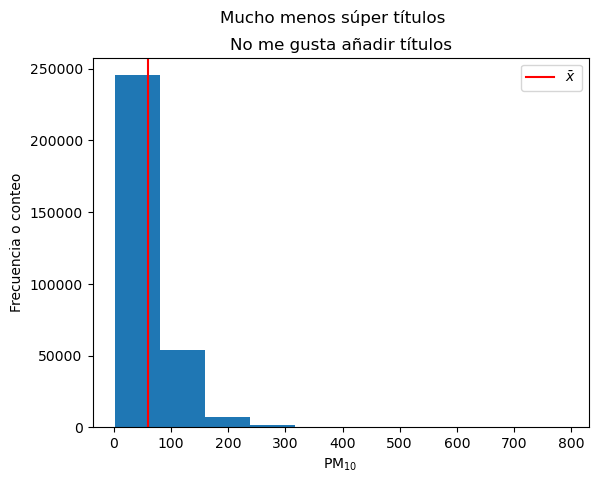

In [47]:
plt.figure(figsize = (6.4, 4.8)) # figura con tamaño por defecto
plt.hist(df_pm10_dropna.value) # El histograma 🥳
plt.axvline( # Dibujar una línea vertical
    x = df_pm10_dropna.value.mean(), # En la media de los datos
    c = '#ff0000', # De color hexadecimal rojo
    label = '$\\bar{x}$' # con este identificador
)

plt.title('No me gusta añadir títulos')
plt.suptitle('Mucho menos súper títulos')

plt.xlabel('PM$_{10}$') # Título del eje horizontal
plt.ylabel('Frecuencia o conteo') # Título del eje vertical

plt.legend() # Muestra identificadores
plt.show()

Un diagrama de dispersión nos permite ver todos los datos como puntos individuales.

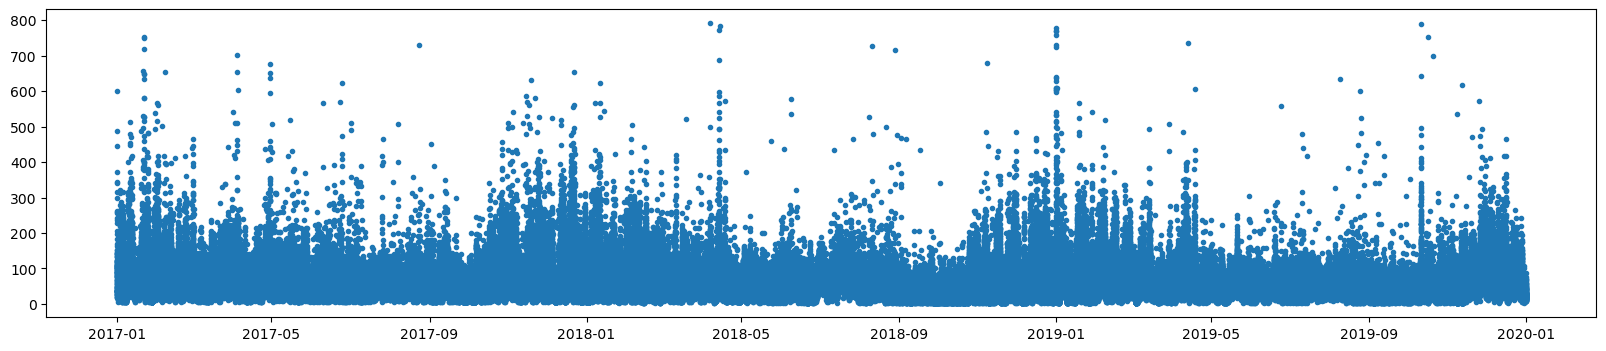

In [48]:
plt.figure(figsize = (20, 4)) # figura con tamaño horizontal en 20 y vertical 4
plt.scatter(
    df_pm10_dropna.timestamp, # Valores del eje horizontal
    df_pm10_dropna.value, # del eje vertical
    marker='.' # y tipo de marcador
)
plt.show()

Como esto es una serie de tiempo, tiene más sentido verla como un gráfico lineal.

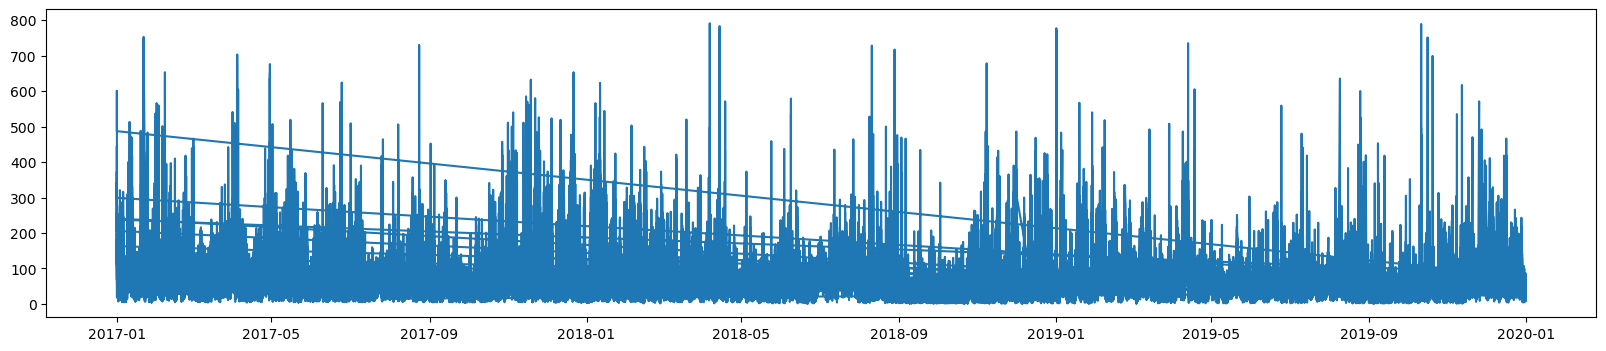

In [49]:
plt.figure(figsize = (20, 4)) # figura con tamaño horizontal en 20 y vertical 4
plt.plot(df_pm10_dropna.timestamp, df_pm10_dropna.value)
plt.show()

Se ve feooooo 🤮, pero se puede arreglar ordenando los valores por `timestamp`. También se puede poner como índice, para no batallar.

In [50]:
df_pm10_dropna.sort_values('timestamp', inplace=True)
df_pm10_dropna.reset_index(inplace=True, drop=True)
df_pm10_dropna

C:\Users\user\AppData\Local\Temp\ipykernel_7668\3738854755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10_dropna.sort_values('timestamp', inplace=True)


,timestamp,lat,lon,h,variable,value,w
0,2017-01-01 00:00:00,25.6700,-100.3380,560,PM10,143.00,0.250000
1,2017-01-01 00:00:00,25.7500,-100.2550,476,PM10,487.00,0.250000
2,2017-01-01 00:00:00,25.8000,-100.3440,528,PM10,132.00,0.250000
3,2017-01-01 00:00:00,25.6760,-100.4640,694,PM10,112.00,0.250000
4,2017-01-01 00:00:00,25.7770,-100.1880,432,PM10,238.00,0.250000
...,...,...,...,...,...,...,...
308531,2019-12-31 23:00:00,25.6460,-100.0960,387,PM10,31.00,0.071429
308532,2019-12-31 23:00:00,25.3600,-99.9955,340,PM10,64.00,0.071429
308533,2019-12-31 23:00:00,25.6700,-100.3380,560,PM10,76.72,0.071429
308534,2019-12-31 23:00:00,25.7295,-100.3099,520,PM10,20.00,0.071429


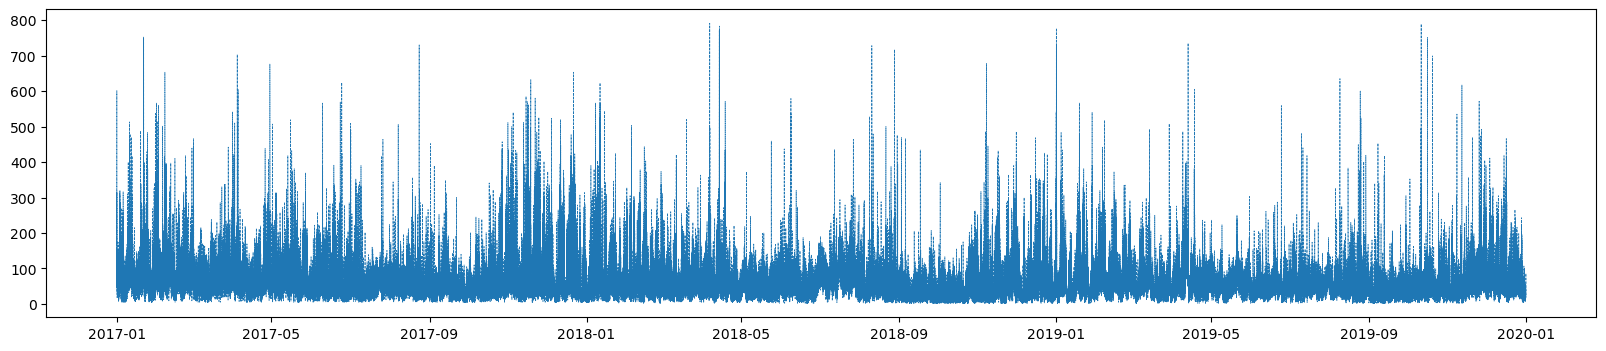

In [51]:
plt.figure(figsize = (20, 4)) # figura con tamaño horizontal en 20 y vertical 4
plt.plot(df_pm10_dropna.timestamp, df_pm10_dropna.value, 
    linestyle = 'dashed',
    linewidth = 0.5 # Ancho de línea
)
plt.show()

Las gráficas de barras muestran información agrupada en rangos ordenados según un criterio.

In [52]:
# Reajuste a media por semana
t = df_pm10_dropna.resample('W', on='timestamp').mean()
t

C:\Users\user\AppData\Local\Temp\ipykernel_7668\753487558.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df_pm10_dropna.resample('W', on='timestamp').mean()


,lat,lon,h,value,w
timestamp,,,,,
2017-01-01,25.712111,-100.301444,530.666667,86.976852,0.250000
2017-01-08,25.717489,-100.321726,543.710806,63.736415,0.144218
2017-01-15,25.717099,-100.323742,545.411139,92.566333,0.143259
2017-01-22,25.718287,-100.325578,546.520619,86.035438,0.138002
2017-01-29,25.720073,-100.331630,550.193428,71.909485,0.141750
...,...,...,...,...,...
2019-12-08,25.676330,-100.287480,532.255906,79.023125,0.146495
2019-12-15,25.680165,-100.293588,535.419125,84.037945,0.142806
2019-12-22,25.677560,-100.296364,538.319200,60.089157,0.143214


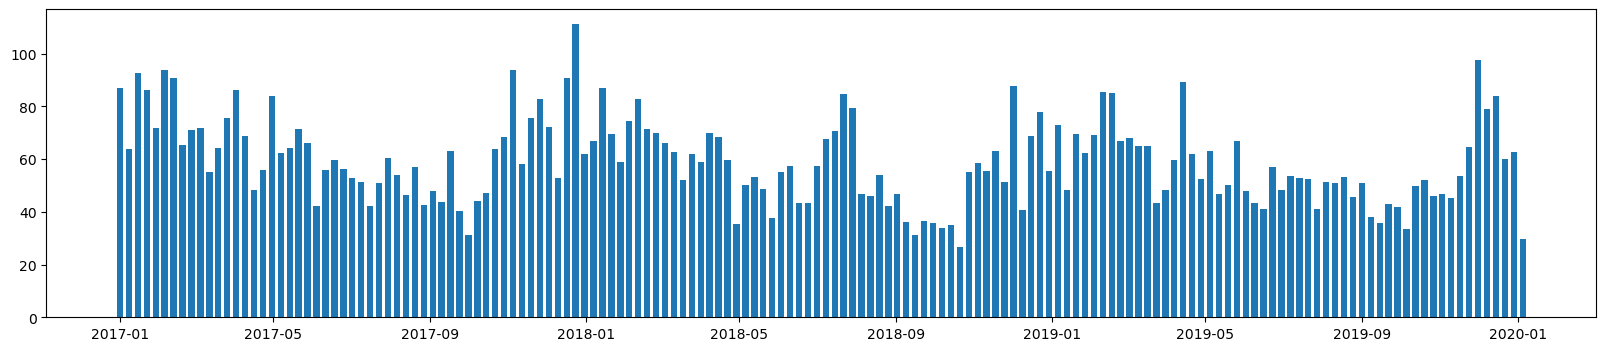

In [53]:
plt.figure(figsize = (20, 4)) # figura con tamaño horizontal en 20 y vertical 4
plt.bar(t.index, t.value, width=5)
plt.show()

Un diagrama de cajas y bigotes (o _boxplot_ en inglés) muestra los valores mínimo, máximo, primer cuartil, segundo cuartil (que corresponde con la mediana), tercer cuartil y _outliers_.

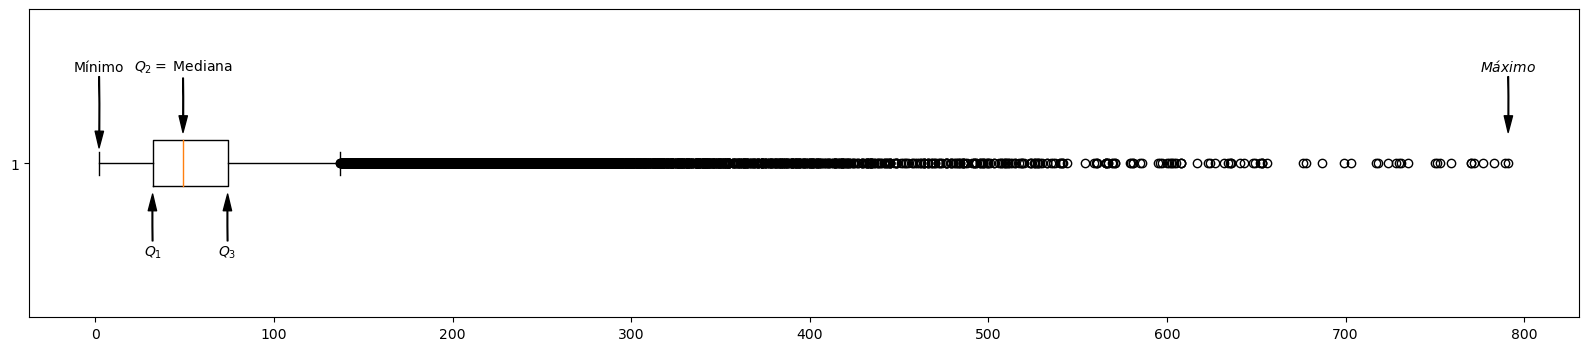

In [54]:
plt.figure(figsize=(20, 4))
plt.boxplot(df_pm10_dropna.value, vert=False)

ax = plt.gca() # Esto separa los ejes de la figura
ax.annotate(
    'Mínimo', 
    xy=(min(df_pm10_dropna.value), 1.05), 
    xytext=(min(df_pm10_dropna.value), 1.3), 
    ha="center",
    arrowprops=dict(
        facecolor = 'black', 
        width = 0.5,
        headwidth = 6,
        connectionstyle="arc3,rad=-0.01"
    )
)

ax.annotate(
    '$Q_1$', 
    xy=(df_pm10_dropna.value.quantile(.25), 0.9), 
    xytext=(df_pm10_dropna.value.quantile(.25), 0.7), 
    ha="center",
    arrowprops=dict(
        facecolor = 'black', 
        width = 0.5,
        headwidth = 6,
        connectionstyle="arc3,rad=-0.01"
    )
)

ax.annotate(
    '$Q_2 =$ Mediana', 
    xy=(df_pm10_dropna.value.quantile(.5), 1.1), 
    xytext=(df_pm10_dropna.value.quantile(.5), 1.3), 
    ha="center",
    arrowprops=dict(
        facecolor = 'black', 
        width = 0.5,
        headwidth = 6,
        connectionstyle="arc3,rad=-0.01"
    )
)

ax.annotate(
    '$Q_3$', 
    xy=(df_pm10_dropna.value.quantile(.75), 0.9), 
    xytext=(df_pm10_dropna.value.quantile(.75), 0.7), 
    ha="center",
    arrowprops=dict(
        facecolor = 'black', 
        width = 0.5,
        headwidth = 6,
        connectionstyle="arc3,rad=-0.01"
    )
)

ax.annotate(
    '$Máximo$', 
    xy=(max(df_pm10_dropna.value), 1.1), 
    xytext=(max(df_pm10_dropna.value), 1.3), 
    ha="center",
    arrowprops=dict(
        facecolor = 'black', 
        width = 0.5,
        headwidth = 6,
        connectionstyle="arc3,rad=-0.01"
    )
)
plt.show()

Cuando se tienen tantos valores atípicos, es mejor usar un diagrama de violín, que muestra la distribución de los datos espejeada, sobre los valores mínimos y máximos.

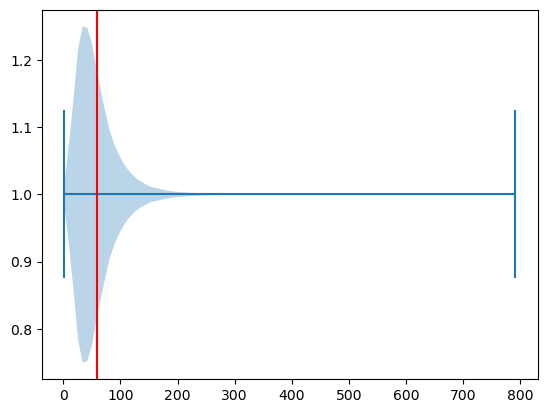

In [55]:
plt.figure()
plt.violinplot(df_pm10_dropna.value, vert=False)
plt.axvline( # Dibujar una línea vertical
    x = df_pm10_dropna.value.mean(), # En la media de los datos
    c = '#ff0000', # De color hexadecimal rojo
    label = '$\\bar{x}$' # con este identificador
)
plt.show()

Para comparar distribuciones, me agradan los diagramas de surcos (o _ridgelines_), a los que también les llaman _Joyplots_ por la portada del álbum [_Unknown pleasures_ de Joy Division](https://www.indierocks.mx/musica/articulos/a-40-anos-del-unknown-pleasures-de-joy-division/).

In [56]:
# https://www.analyticsvidhya.com/blog/2021/06/ridgeline-plots-visualize-data-with-a-joy/
from joypy import joyplot

<Figure size 640x480 with 0 Axes>

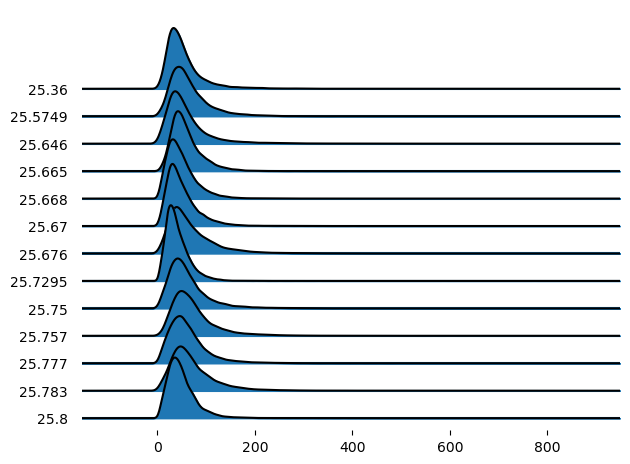

In [57]:
plt.figure()
joyplot(df_pm10_dropna, by='lat', column='value')
plt.show()

Para series de tiempo, las vistas de calendario son geniales.

In [58]:
import calplot

In [59]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np

(<Figure size 1250x510 with 4 Axes>,
 array([<AxesSubplot: ylabel='2017'>, <AxesSubplot: ylabel='2018'>,
        <AxesSubplot: ylabel='2019'>], dtype=object))

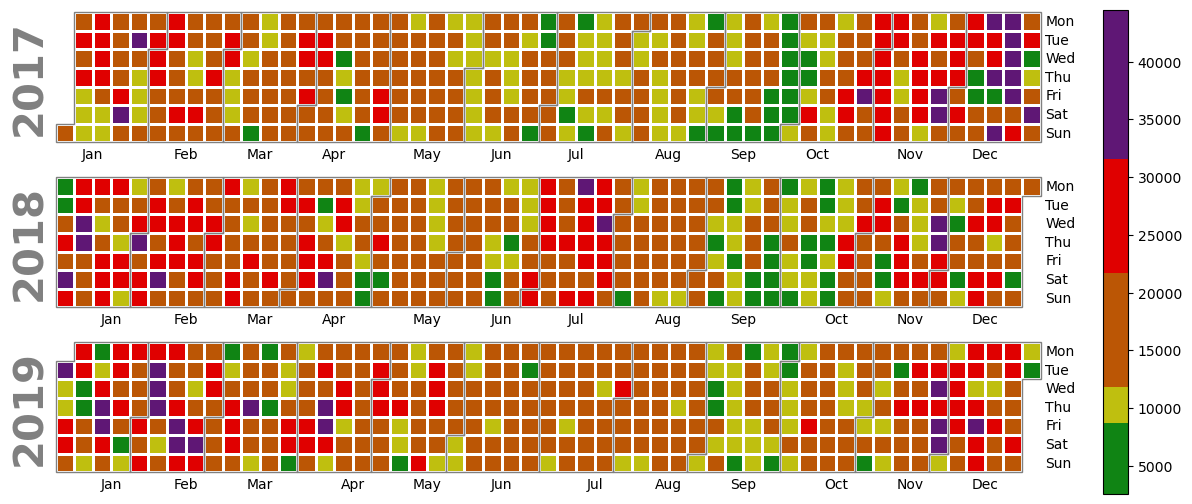

In [60]:
viridis = cm.get_cmap('viridis', 340) # Se genera un mapa de color de hasta 340 colores
newcolors = viridis(np.linspace(0, 1, 340)) # Se hace una función lineal del mapa de colores de 0 hasta 340 de 1 en 1

# Se definen rangos de colores
newcolors[:50, :] = np.array([21/340, 176/340, 26/340, 1]) # Bueno
newcolors[50:75, :] = np.array([255/340, 255/340, 20/340, 1]) # Regular
newcolors[75:155, :] = np.array([249/340, 115/340, 6/340, 1]) # Malo
newcolors[155:235, :] = np.array([299/340, 0/340, 0/340, 1]) # Muy malo
newcolors[235:340, :] = np.array([126/340, 30/340, 156/340, 1]) # Extremadamente malo
newcmp = ListedColormap(newcolors) # A partir de esos colores, se fija un nuevo mapa de color

calplot.calplot(df_pm10_dropna.set_index('timestamp').value, cmap = newcmp, 
    yearlabel_kws=dict( # Esto es nomás porque no tengo Helvetica instalada 😅
        fontsize=30,
        color='gray',
        fontname='sans-serif',
        fontweight='bold',
        ha='center')
)

## Pruebas de correlación

La correlación $\rho$ mide la relación lineal entre dos variables $x, y$ normalizadas por sus desviaciones estándar $s_x, s_y$. Se calcula mediante
$$\rho = \frac{\sum(x - \bar{x}) (y - \bar{y})}{s_x s_y}.$$

In [61]:
df_sel.columns

Index(['timestamp', 'lat', 'lon', 'h', 'variable', 'value'], dtype='object')

In [62]:
df_by_cols = df_sel.pivot_table('value', ['timestamp', 'lat', 'lon', 'h'], 'variable')
df_by_cols

variable                                    BP    CO    NO   NO2   NOX   O3  \
timestamp           lat    lon      h                                         
2017-01-01 00:00:00 25.646 -100.096 387  721.3   NaN  32.3  35.2  66.4  6.0   
                    25.665 -100.413 636  712.5  1.10  17.0  20.1  37.0  6.0   
                    25.668 -100.249 492  720.5  3.77   NaN   NaN   NaN  6.0   
                    25.670 -100.338 560  709.2  2.47  16.0  15.1  31.1  6.0   
                    25.676 -100.464 694  698.8   NaN   NaN   NaN   NaN  NaN   
...                                        ...   ...   ...   ...   ...  ...   
2019-12-31 23:00:00 25.750 -100.255 476  722.0   NaN   0.5   NaN   NaN  NaN   
                    25.757 -100.366 571  715.1   NaN   NaN   NaN   NaN  NaN   
                    25.777 -100.188 432  718.7  1.37   NaN   NaN   NaN  NaN   
                    25.783 -100.586 716  703.4  1.58   NaN   NaN   NaN  NaN   
                    25.800 -100.344 528  715.5   NaN   NaN   NaN   NaN  NaN   

variable                                  PM10  PM2_5    RF    RH   SO2  \
timestamp           lat    lon      h                                     
2017-01-01 00:00:00 25.646 -100.096 387  299.0    NaN  0.00  61.0  18.0   
                    25.665 -100.413 636  163.0    NaN  0.00  54.0   5.0   
                    25.668 -100.249 492  206.0    NaN  0.00  72.0  11.8   
                    25.670 -100.338 560  143.0    NaN  0.00  64.0   NaN   
                    25.676 -100.464 694  112.0    NaN  0.00  57.0   NaN   
...                                        ...    ...   ...   ...   ...   
2019-12-31 23:00:00 25.750 -100.255 476   86.0    NaN   NaN  96.0   1.5   
                    25.757 -100.366 571   71.0  57.71  0.00  90.0   NaN   
                    25.777 -100.188 432   17.0  10.00  0.02  94.0   NaN   
                    25.783 -100.586 716    NaN  93.81  0.00  89.0   NaN   
                    25.800 -100.344 528   44.0  40.75  0.00  87.0   NaN   

variable                                    SR      T     WD    WV  
timestamp           lat    lon      h                               
2017-01-01 00:00:00 25.646 -100.096 387  0.000  18.40    NaN   5.1  
                    25.665 -100.413 636  0.000  20.68  253.0   4.0  
                    25.668 -100.249 492  0.007  18.71   22.0   8.8  
                    25.670 -100.338 560  0.004  19.46  300.0   3.0  
                    25.676 -100.464 694  0.001  20.35  269.0   6.7  
...                                        ...    ...    ...   ...  
2019-12-31 23:00:00 25.750 -100.255 476  0.000  10.73    NaN   6.7  
                    25.757 -100.366 571  0.002  11.02    NaN   7.2  
                    25.777 -100.188 432  0.000  11.14    NaN   4.9  
                    25.783 -100.586 716  0.002   9.94  122.0  10.4  
                    25.800 -100.344 528  0.002  10.91  102.0   NaN  

[319790 rows x 15 columns]

In [63]:
corr_ = df_by_cols[['PM10', 'PM2_5']].corr()
corr_

variable,PM10,PM2_5
variable,,
PM10,1.000000,0.643154
PM2_5,0.643154,1.000000


Para este tipo de representaciones, un mapa de calor funciona bastante bien.

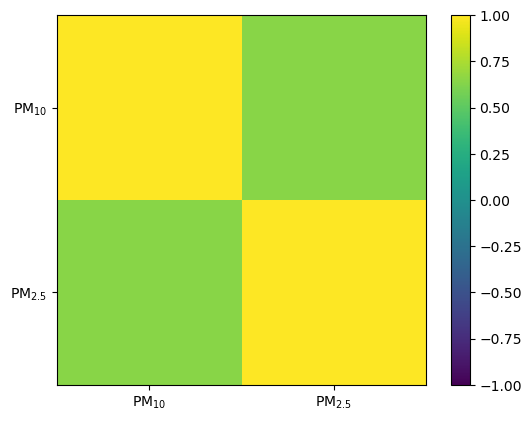

In [64]:
plt.figure()
plt.imshow(corr_)
plt.xticks(ticks=[0, 1], labels=['PM$_{10}$', 'PM$_{2.5}$'])
plt.yticks(ticks=[0, 1], labels=['PM$_{10}$', 'PM$_{2.5}$'])
plt.clim(vmin = -1, vmax = 1)
plt.colorbar()
plt.show()

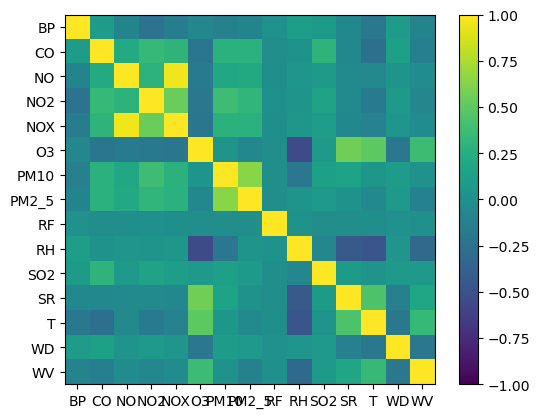

In [70]:
corr_ = df_by_cols.corr()
ticks_ = list(range(len(df_by_cols.columns)))
plt.figure()
plt.imshow(corr_)
plt.xticks(ticks = ticks_, labels = df_by_cols.columns)
plt.yticks(ticks = ticks_, labels = df_by_cols.columns)
plt.clim(vmin = -1, vmax = 1)
plt.colorbar()
plt.show()

## Pruebas de normalidad

Los datos pueden seguir una distribución gaussiana o normal. A este tipo de datos se les llama datos paramétricos. Cuando no siguen esta distribución, se consideran no paramétricos.

In [74]:
# Generar datos aleatorios
mu = 10
sigma = 2
n = 1000
r_norm = np.random.normal(mu, sigma, 10000)

In [76]:
statistics.mean(r_norm)

9.99777434091072

In [77]:
statistics.stdev(r_norm)

2.015730289310302

Se mantienen relativamente constantes los valores de media y desviación estándar. Visualmente se puede comprobar con histogramas.

In [78]:
# Nos ayudamos de la librería scipy para generar una función de distribución de probabilidad o pdf
from scipy.stats import norm

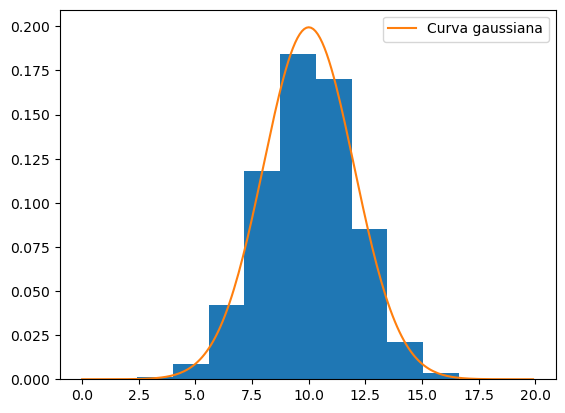

In [93]:
plt.figure()
plt.hist(r_norm, density=True)

plt.plot(np.arange(0, 20, 0.1), norm.pdf(np.arange(0, 20, 0.1), mu, sigma), label = 'Curva gaussiana')
plt.legend()
plt.show()

También los diagramas de cuantil-cuantil son útiles para intuir la normalidad de los datos. Mientras la relación de los cuantiles teóricos y los de la muestra se mantenga sobre la regresión lineal, se considera que los datos son normales.

In [94]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 640x480 with 0 Axes>

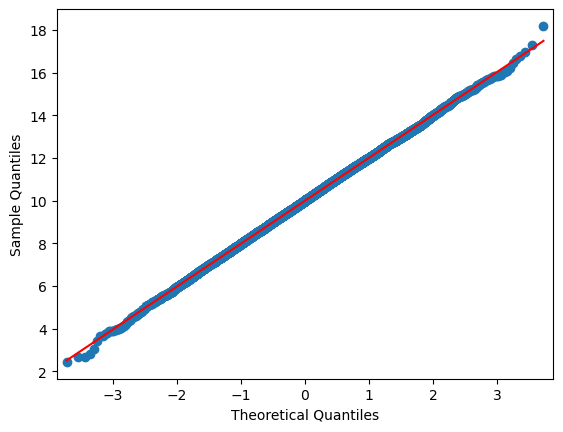

In [96]:
plt.figure()
qqplot(r_norm, line='s')
plt.show()

Formalmente, esto se realiza con pruebas de normalidad estadísticas. El más usado es el de Shapiro-Wilk, con la salvedad de que se usa en muestras de pocos datos (mil observaciones o menos). La hipótesis nula $H_0$ de esta prueba supone que una muestra $x$ proviene de una distribución de probabilidad normalmente distribuida. La prueba se rechaza si el estadístico (con valores entre 0 y 1) es demasiado pequeño (o si el valor $p$ es mejor que determinado valor $\alpha$ generalmente $\alpha = 0.05$).

In [97]:
from scipy.stats import shapiro

In [103]:
stat, p = shapiro(r_norm)
alpha = 0.05
if p < alpha:
    print(f'La prueba no parece normal con $p={round(p, 4)}$')
else:
    print(f'La prueba parece normal con $p={round(p, 4)}$')

La prueba parece normal con $p=0.7926$


Cuando los datos siguen una distribución normal, se pueden usar [pruebas estadísticas paramétricas](https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/) para realizar inferencias sobre ellos. De otra manera, se usan pruebas [no paramétricas](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/).

# Tarea en clase (2 puntos)

- Crear funciones para calcular las medidas de tendencia central y de dispersión con Python puro (sin librerías)
- Comprueba si tus variables de interés son conjuntos de datos paramétricos o no paramétricos

# Tarea (8 puntos)

- Calcula estadísticos descriptivos básicos para tus datos
- Haz una matriz de correlación de tus datos y escribe algunas interpretaciones de la misma
- Realiza alguna prueba de hipótesis a partir de las conclusiones que hayas sacado de la matriz de correlación
- Presenta tus resultados gráficamente

- https://realpython.com/python-statistics/#calculating-descriptive-statistics
- https://machinelearningmastery.com/statistical-hypothesis-tests/
- https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/